# Libraries

In [1]:
import sys
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPYDEV'
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY'
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

# Run

In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example1

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 3, 
             'none variable': None,
             'objective function': nowak_collins_example1,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

09:31:06 - Checking inputs completed!
09:31:06 - Started State Limit Function evaluation (g)...
09:31:10 - Finished State Limit Function evaluation (g) in 3.45e+00 seconds!
09:31:10 - Started evaluation beta reliability index and failure probability...
09:31:10 - Finished evaluation beta reliability index and failure probability in 9.39e-03 seconds!
09:31:10 - Voilà!!!!....simulation results were not saved in a text file!


In [3]:
# results.to_excel('data_results.xlsx')
results_filtered = results[results['X_0'] > 50]
results_filtered

,X_0,X_1,X_2,R_0,R_1,R_2,S_0,S_1,S_2,G_0,G_1,G_2,I_0,I_1,I_2
37,54.684251,10.576504,0.235628,4374.740067,4374.740067,4374.740067,1945.314337,1945.314337,1945.314337,2429.425730,2429.425730,2429.425730,0.0,0.0,0.0
58,50.560114,10.379853,0.257801,4044.809135,4044.809135,4044.809135,2064.010317,2064.010317,2064.010317,1980.798818,1980.798818,1980.798818,0.0,0.0,0.0
132,50.728392,10.732771,0.216975,4058.271390,4058.271390,4058.271390,1844.965377,1844.965377,1844.965377,2213.306014,2213.306014,2213.306014,0.0,0.0,0.0
307,50.141713,9.163909,0.252441,4011.337026,4011.337026,4011.337026,1967.084705,1967.084705,1967.084705,2044.252320,2044.252320,2044.252320,0.0,0.0,0.0
329,52.067116,11.424248,0.301739,4165.369277,4165.369277,4165.369277,2376.651577,2376.651577,2376.651577,1788.717700,1788.717700,1788.717700,0.0,0.0,0.0
362,51.901313,10.525318,0.270012,4152.105037,4152.105037,4152.105037,2143.078353,2143.078353,2143.078353,2009.026684,2009.026684,2009.026684,0.0,0.0,0.0
495,50.434046,8.676057,0.240533,4034.723693,4034.723693,4034.723693,1871.294013,1871.294013,1871.294013,2163.429680,2163.429680,2163.429680,0.0,0.0,0.0
541,50.766683,9.924805,0.256690,4061.334615,4061.334615,4061.334615,2032.954281,2032.954281,2032.954281,2028.380334,2028.380334,2028.380334,0.0,0.0,0.0
659,50.361450,10.313297,0.242187,4028.915987,4028.915987,4028.915987,1969.355520,1969.355520,1969.355520,2059.560467,2059.560467,2059.560467,0.0,0.0,0.0
667,50.715993,8.624200,0.254539,4057.279441,4057.279441,4057.279441,1950.178833,1950.178833,1950.178833,2107.100607,2107.100607,2107.100607,0.0,0.0,0.0


In [4]:
a = []
for coluna in pf:
    a += pf[coluna].to_list()

a


[0.002, 0.002, 0.002]

In [5]:
beta

,I_0,I_1,I_2
0,2.878162,2.878162,2.878162


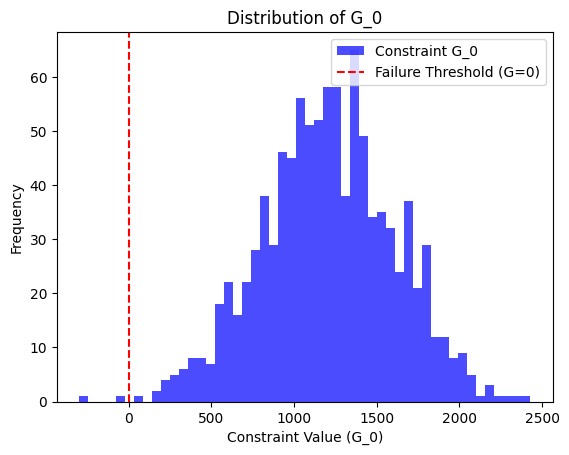

Most Probable Points Near Failure (G_0):
           X_0        X_1       X_2          R_0          R_1          R_2  \
768  24.992877   9.021321  0.265171  1999.430132  1999.430132  1999.430132   
278  28.998002  10.586213  0.293874  2319.840158  2319.840158  2319.840158   
462  30.225038  11.489546  0.279585  2418.003037  2418.003037  2418.003037   

             S_0          S_1          S_2         G_0         G_1  \
768  2033.630133  2033.630133  2033.630133  -34.200001  -34.200001   
278  2285.527119  2285.527119  2285.527119   34.313038   34.313038   
462  2250.975650  2250.975650  2250.975650  167.027387  167.027387   

            G_2  I_0  I_1  I_2  
768  -34.200001  1.0  1.0  1.0  
278   34.313038  0.0  0.0  0.0  
462  167.027387  0.0  0.0  0.0  


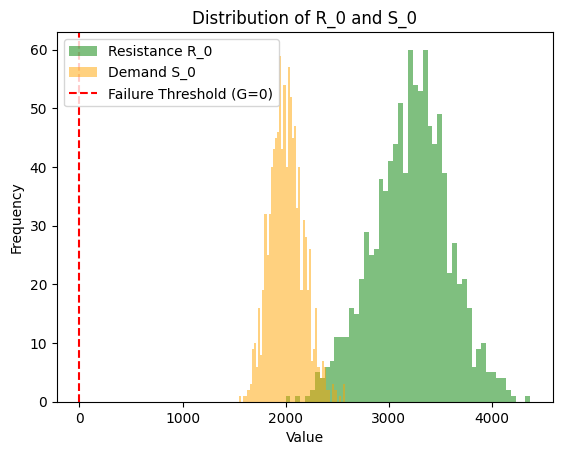

Equation 1 - p_f: 0.002000, β: 2.878162
Equation 2 - p_f: 0.002000, β: 2.878162
Equation 3 - p_f: 0.002000, β: 2.878162


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results' is the DataFrame from the simulation
# Sample structure: X_0, X_1, X_2, R_0, S_0, G_0, ...

# 1. Plot histogram of G_0
plt.hist(results['G_0'], bins=50, alpha=0.7, color='blue', label='Constraint G_0')
plt.axvline(0, color='red', linestyle='--', label='Failure Threshold (G=0)')
plt.title("Distribution of G_0")
plt.xlabel("Constraint Value (G_0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0
closest_to_zero = results.iloc[(results['G_0'] - 0).abs().argsort()[:3]]
print("Most Probable Points Near Failure (G_0):")
print(closest_to_zero)

# 3. Overlay histograms for R_0 and S_0
plt.hist(results['R_0'], bins=50, alpha=0.5, color='green', label='Resistance R_0')
plt.hist(results['S_0'], bins=50, alpha=0.5, color='orange', label='Demand S_0')
plt.axvline(0, color='red', linestyle='--', label='Failure Threshold (G=0)')
plt.title("Distribution of R_0 and S_0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.values.flatten().tolist() 
beta_list = beta.values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for idx, (pf_value, beta_value) in enumerate(zip(pf_list, beta_list)):
    print(f"Equation {idx + 1} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")
